# Political Sentiment Analysis on Social Media 

In [1]:
# Importing Libraries
import os
import pandas as pd


## Using the Dataset of Nepali Tweets on 2022 Election 

In [2]:
# Merging the Labeled Tweets Datasets
labeled_dir = 'labeled'
all_labeled=[]

for file in os.listdir(labeled_dir):
    if file.endswith(".xlsx"):
        df = pd.read_excel(os.path.join(labeled_dir, file))
        df = df[['id', 'text', 'label']].dropna()
        all_labeled.append(df)

labeled_df = pd.concat(all_labeled, ignore_index=True)
labeled_df['id'] = labeled_df['id'].astype(str)


In [3]:
# Filtering the Main Datasets for labeled Tweets using the column 'id'
main_df = pd.read_excel("nepali_tweets.xlsx")
main_df['id'] = main_df['id'].astype(str)

# Join labeled tweets with full metadata
merged_df = pd.merge(labeled_df, main_df, on='id', how='left')

In [4]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,statuses_count,coordinates,is_quote_status,retweet_count,retweeted,lang,source,place,kwd,run_date
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,BirshaNachhiri1,life is not easy do hard work with faithful!,NaN,[],...,894,NaN,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,nirdosh2813,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,10776,NaN,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,Trishna50664774,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,11834,NaN,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,nepalviewsnv,NaN,Nepal,[],...,26189,NaN,False,0,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,imagekhabar,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,175220,NaN,False,0,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06


In [5]:
merged_df.head()
# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_labeled_tweets.csv', index=False)
print("Merged labeled tweets saved to 'merged_labeled_tweets.csv'")

Merged labeled tweets saved to 'merged_labeled_tweets.csv'


## Preprocessing the Tweets

In [6]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import emoji
import re


In [8]:
# Loading the stopwords
with open("nepali_stopwords.txt", "r", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

# Function to clean the texts

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"[\u200c\u200d\u200e\u200f\u202a-\u202e]", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[a-zA-Z0-9०-९।!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~]", "", text)
     # Remove punctuation (both Latin and Devanagari punctuation)
    text = re.sub(r"[।!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~]", "", text)
    
    # Remove Latin letters and digits
    text = re.sub(r"[a-zA-Z0-9०-९]", "", text)
    words = text.strip().split()
    words = [w for w in words if w not in stopwords and 2 <= len(w) <= 20]
    return " ".join(words)

merged_df['clean_text'] = merged_df['text_x'].apply(clean_text)

Vocabulary Filtering

-- Filtering the rare and long words

In [9]:
from collections import Counter

word_counts = Counter(" ".join(merged_df["clean_text"]).split())
rare_words = set([w for w, c in word_counts.items() if c < 20])

def filter_rare(text):
    return " ".join([w for w in text.split() if w not in rare_words])

merged_df['final_text'] = merged_df['clean_text'].apply(filter_rare)
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,is_quote_status,retweet_count,retweeted,lang,source,place,kwd,run_date,clean_text,final_text
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,BirshaNachhiri1,life is not easy do hard work with faithful!,NaN,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,nirdosh2813,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,Trishna50664774,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद"
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,nepalviewsnv,NaN,Nepal,[],...,False,0,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,imagekhabar,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,False,0,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित


In [10]:
# Dropping the duplicates
merged_df = merged_df.drop_duplicates(subset='final_text')

In [11]:
# Annonimizing the Usernames for to remove Personal Identifiable Information (PII)
import hashlib
def hash_username(username):
    if pd.isnull(username):
        return ""
    return hashlib.sha256(username.encode('utf-8')).hexdigest()

merged_df['user'] = merged_df['user'].apply(hash_username)

In [12]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,is_quote_status,retweet_count,retweeted,lang,source,place,kwd,run_date,clean_text,final_text
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,939c7de092e923e9e75ae70923f3da8dc9dbf606121bf7...,life is not easy do hard work with faithful!,NaN,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,71ddb83740cf9cd2f94937d8af21f834f6e81304ac083e...,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,6614a78b04284662923d2c2cf9ec10c13c3dca48f2103e...,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद"
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,52ba518166bbb3d11b6adb5c67e59ff5e5106c2feb1c8d...,NaN,Nepal,[],...,False,0,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,601fcb344dce80db314d8cbed385cc6ddc2e5eb996b419...,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,False,0,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित


In [13]:
merged_df = merged_df[merged_df['label'].isin([0, 1, 2, 3])]

In [14]:
merged_df[['id', 'final_text', 'label']].to_csv("cleaned_labeled_tweets.csv", index=False)

Exploratory Data Analysis

C:\Users\hello\AppData\Local\Temp\ipykernel_15000\291452448.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="label_name", order=label_map.values(), palette="Set2")


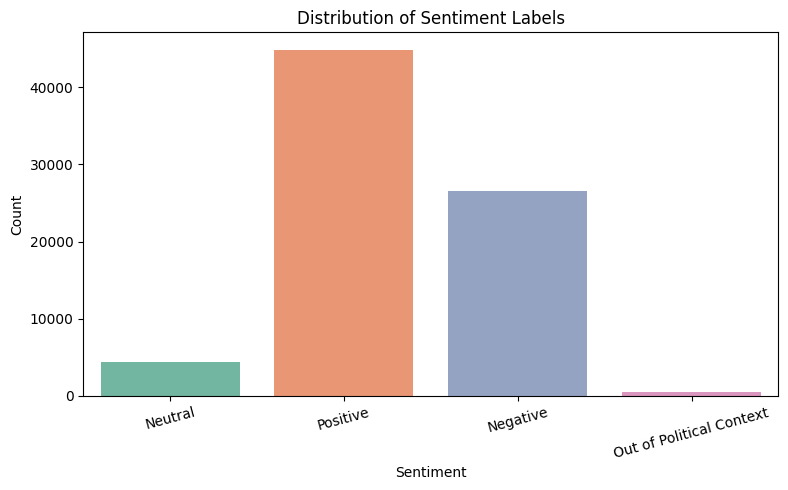

In [15]:
# Label Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Label map for readability
label_map = {
    0: "Neutral",
    1: "Positive",
    2: "Negative",
    3: "Out of Political Context"
}

merged_df["label_name"] = merged_df["label"].map(label_map)

plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x="label_name", order=label_map.values(), palette="Set2")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


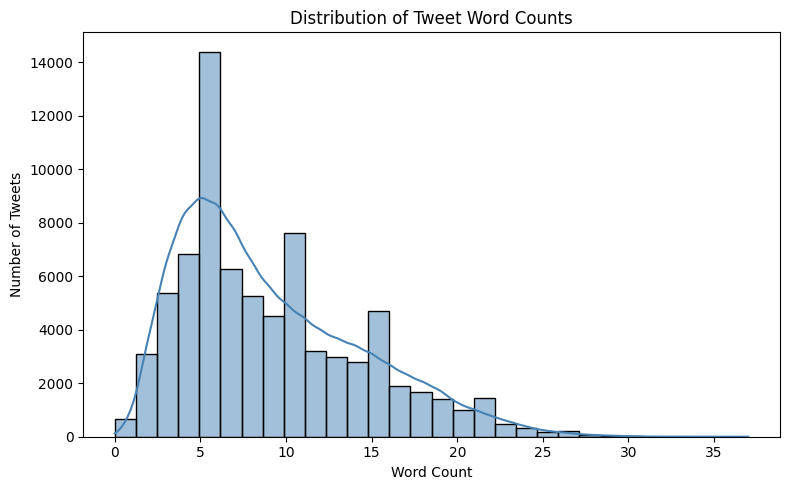

In [16]:
# Tweet Length Distribution

# Adding a length column
merged_df["text_length"] = merged_df["final_text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x="text_length", bins=30, kde=True, color="steelblue")
plt.title("Distribution of Tweet Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

C:\Users\hello\AppData\Local\Temp\ipykernel_15000\1036868276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette="pastel")


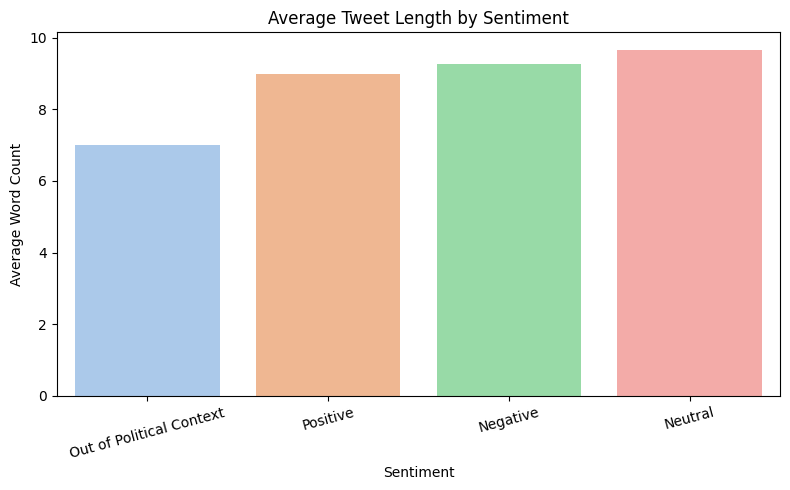

In [17]:
# Average Tweet Length by Sentiment
avg_lengths = merged_df.groupby("label_name")["text_length"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette="pastel")
plt.title("Average Tweet Length by Sentiment")
plt.ylabel("Average Word Count")
plt.xlabel("Sentiment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s)

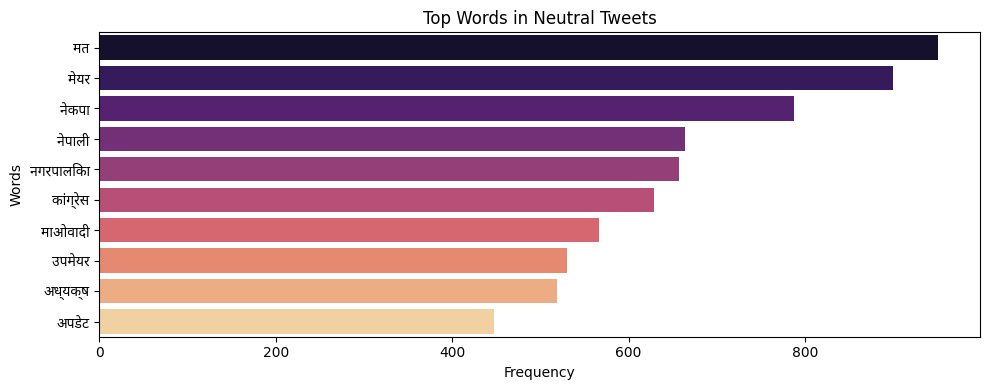

C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s)

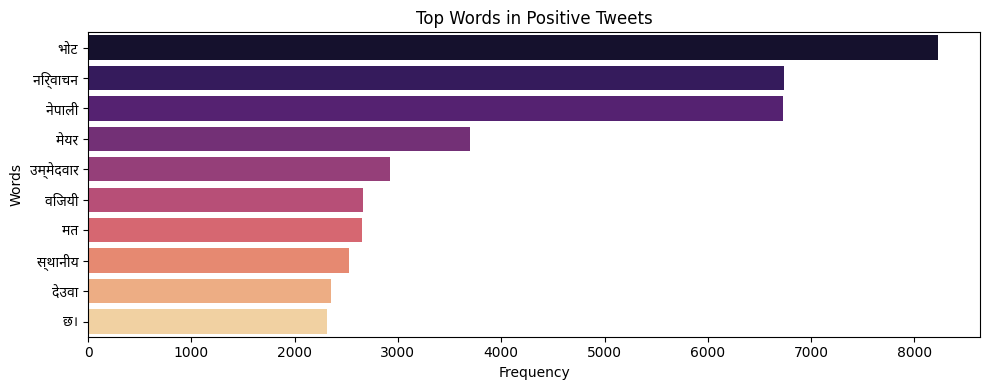

C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s)

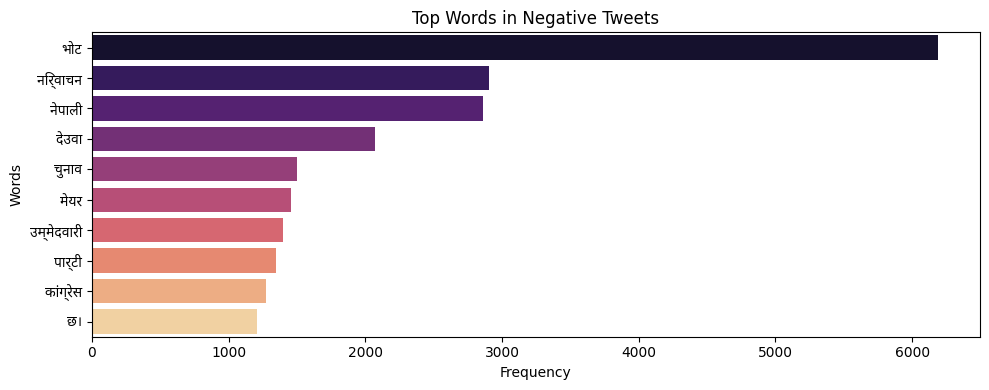

C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_15000\4229131117.py:39: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s)

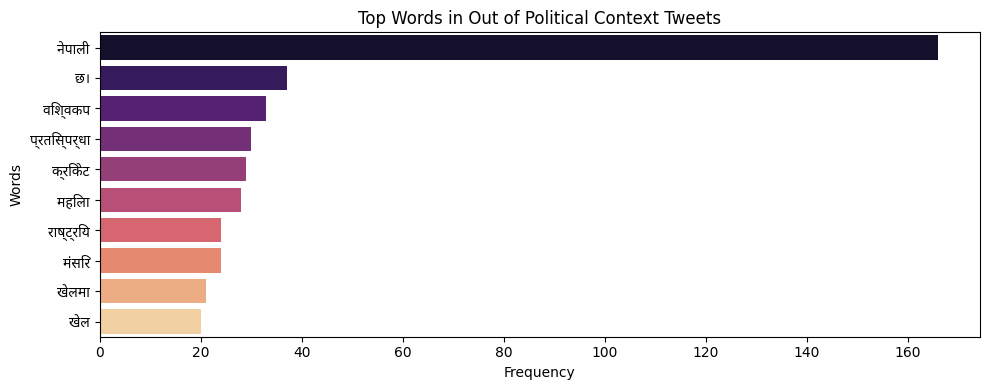

In [18]:
# ✅ Install and apply a Devanagari-compatible font (Noto Sans Devanagari)
# import urllib.request
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
import seaborn as sns

# Step 1: Download the font
# font_url = "https://notofonts.github.io/devanagari/fonts/NotoSansDevanagari/unhinted/ttf/NotoSansDevanagari-Regular.ttf"
font_path = "font/NotoSansDevanagari-Regular.ttf"
# urllib.request.urlretrieve(font_url, font_path)

# Step 2: Load the font
devanagari_font = fm.FontProperties(fname=font_path)

# ✅ Step 3: Function to get top N words
def get_top_words(texts, n=10):
    words = " ".join(texts).split()
    return Counter(words).most_common(n)

# ✅ Step 4: Plot top words per sentiment class using Devanagari-compatible font
label_map = {
    0: "Neutral",
    1: "Positive",
    2: "Negative",
    3: "Out of Political Context"
}

for label_id, label_name in label_map.items():
    top_words = get_top_words(merged_df[merged_df["label"] == label_id]["final_text"])
    if top_words:
        words, counts = zip(*top_words)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=list(counts), y=list(words), palette="magma")
        plt.title(f"Top Words in {label_name} Tweets")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.yticks(fontproperties=devanagari_font)
        plt.tight_layout()
        plt.show()


<Axes: title={'center': 'Sentiment Trends Over Time'}, xlabel='created_at'>

<Figure size 1400x700 with 0 Axes>

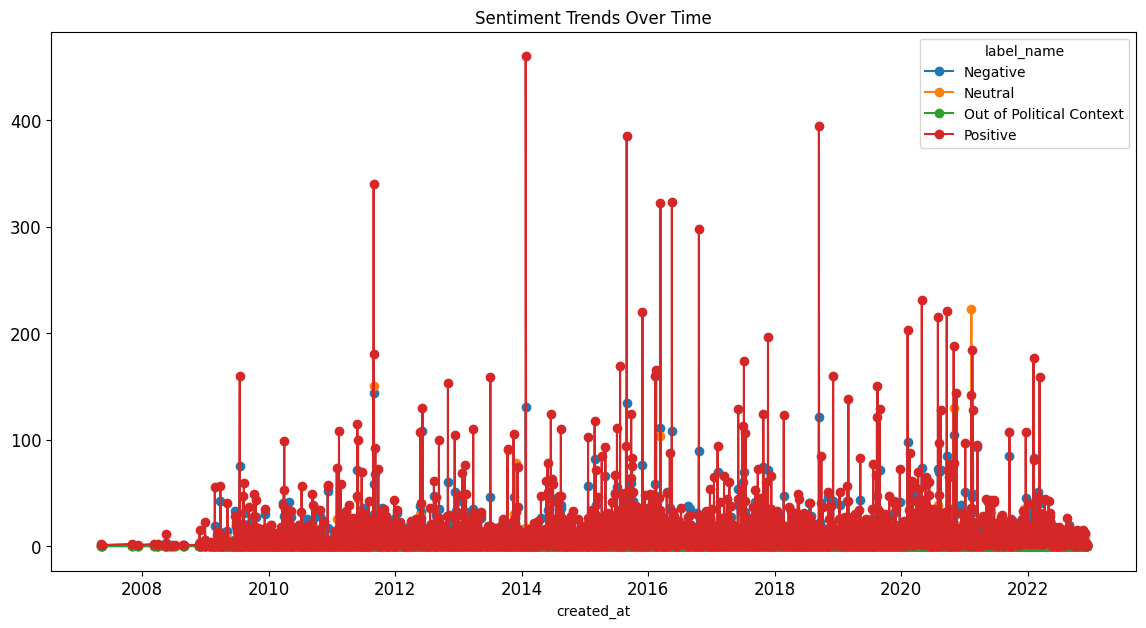

In [19]:
# Sentiment Trends Overtime

# Convert 'created_at' to datetime
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], errors='coerce')

# Group by date and label
daily_trends = merged_df.groupby([merged_df['created_at'].dt.date, 'label_name']).size().unstack(fill_value=0)

# Plotting the trends
plt.figure(figsize=(14, 7))
daily_trends.plot(kind='line', marker='o', figsize=(14, 7), title='Sentiment Trends Over Time', fontsize=12)

In [20]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,retweeted,lang,source,place,kwd,run_date,clean_text,final_text,label_name,text_length
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,939c7de092e923e9e75ae70923f3da8dc9dbf606121bf7...,life is not easy do hard work with faithful!,NaN,[],...,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...,Negative,18
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,71ddb83740cf9cd2f94937d8af21f834f6e81304ac083e...,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।,Negative,5
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,6614a78b04284662923d2c2cf9ec10c13c3dca48f2103e...,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद",Negative,8
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,52ba518166bbb3d11b6adb5c67e59ff5e5106c2feb1c8d...,NaN,Nepal,[],...,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...,Negative,12
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,601fcb344dce80db314d8cbed385cc6ddc2e5eb996b419...,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित,Out of Political Context,6


### LDA (Latent Dirichlet Allocation)
Unsupervised topic modeling algorithm used to discover abstract topics in tweets

In [21]:
%pip install git+https://github.com/anoopkunchukuttan/indic_nlp_library.git

  Cloning https://github.com/anoopkunchukuttan/indic_nlp_library.git to c:\users\hello\appdata\local\temp\pip-req-build-rqd90_cm
  Resolved https://github.com/anoopkunchukuttan/indic_nlp_library.git to commit 4cead0ae6c78fe9a19a51ef679f586206df9c476
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/anoopkunchukuttan/indic_nlp_library.git 'C:\Users\hello\AppData\Local\Temp\pip-req-build-rqd90_cm'

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import unicodedata
from indicnlp.tokenize import indic_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Normalize + Tokenize
def preprocess_for_topic_modeling(text):
    text = unicodedata.normalize("NFKC", text)
    return " ".join(indic_tokenize.trivial_tokenize(text, lang='ne'))

def remove_short_words(text):
    return " ".join([w for w in text.split() if len(w) > 1])

merged_df["tokenized_text"] = merged_df["clean_text"].apply(preprocess_for_topic_modeling)
merged_df["tokenized_text"] = merged_df["tokenized_text"].apply(remove_short_words)

# Step 2: Vectorize (disable token_pattern and use space-split tokens)
vectorizer = CountVectorizer(
    max_df=0.9, 
    min_df=10,
    token_pattern=None,
    tokenizer=str.split,
    analyzer='word'
)

X = vectorizer.fit_transform(merged_df["tokenized_text"])

# Step 3: Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Step 4: Show topics
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())


Topic #1:
भोट मेयर देउवा कांग्रेस मत नेपाली प्रधानमन्त्री हाल्न गठबन्धन रुख
Topic #2:
चुनाव भोट उम्मेदवारी शुभकामना हार्दिक बिजय बधाई बालेन सफल चिन्ह
Topic #3:
निर्वाचन उम्मेदवार नेपाली नेकपा स्थानीय नगरपालिका विजयी मत कांग्रेस मेयर
Topic #4:
भोट देउवा पार्टी ओली नेपाली प्रचण्ड हो गठबन्धन माओवादी केपी
Topic #5:
नेपाली हो निर्वाचन चुनाव जनता राजनीति भोट पार्टी दल देशको


### Interpretation of Topic Groups

Topic #1
    top words: भोट हो मत मेयर गठबन्धन स्वतन्त्र चुनाव दल बालेन उम्मेदवारी
    theme: voter sentiment

Topic #2
    नेपाली कांग्रेस नेकपा माओवादी नगरपालिका विजयी मेयर एमाले मत अध्यक्ष
    theme: Conventional Political Parties

Topic #3
    भोट नेपाली हो जनता जनताको जय पार्टी चुनाव हाल्न जनताले
    theme: Public Participation

Topic #4
    देउवा प्रधानमन्त्री मेयर प्रचण्ड ओली निर्वाचन चुनाव सभापति हर्क शेरबहादुर
    theme: Political personalities

Topic #5
    निर्वाचन स्थानीय उम्मेदवारी मतदान सदस्य उम्मेदवार प्रतिनिधिसभा तह निर्वाचनमा नेपाली
    Theme: Election process

In [22]:
# Assigning Topics to Tweets
topic_probs = lda.transform(X)
merged_df["dominant_topic"] = topic_probs.argmax(axis=1)

In [23]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,source,place,kwd,run_date,clean_text,final_text,label_name,text_length,tokenized_text,dominant_topic
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,939c7de092e923e9e75ae70923f3da8dc9dbf606121bf7...,life is not easy do hard work with faithful!,NaN,[],...,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...,Negative,18,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,4
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,71ddb83740cf9cd2f94937d8af21f834f6e81304ac083e...,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।,Negative,5,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,4
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,6614a78b04284662923d2c2cf9ec10c13c3dca48f2103e...,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद",Negative,8,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,4
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,52ba518166bbb3d11b6adb5c67e59ff5e5106c2feb1c8d...,NaN,Nepal,[],...,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...,Negative,12,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,3
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,601fcb344dce80db314d8cbed385cc6ddc2e5eb996b419...,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित,Out of Political Context,6,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,4


C:\Users\hello\AppData\Local\Temp\ipykernel_15000\2429463796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="dominant_topic", palette="viridis")


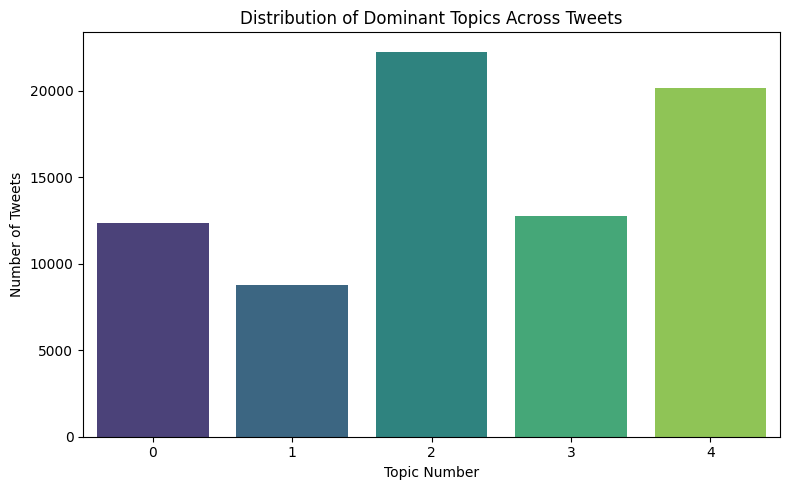

In [24]:
# Visulizing Topic Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x="dominant_topic", palette="viridis")
plt.title("Distribution of Dominant Topics Across Tweets")
plt.xlabel("Topic Number")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()


This shows 

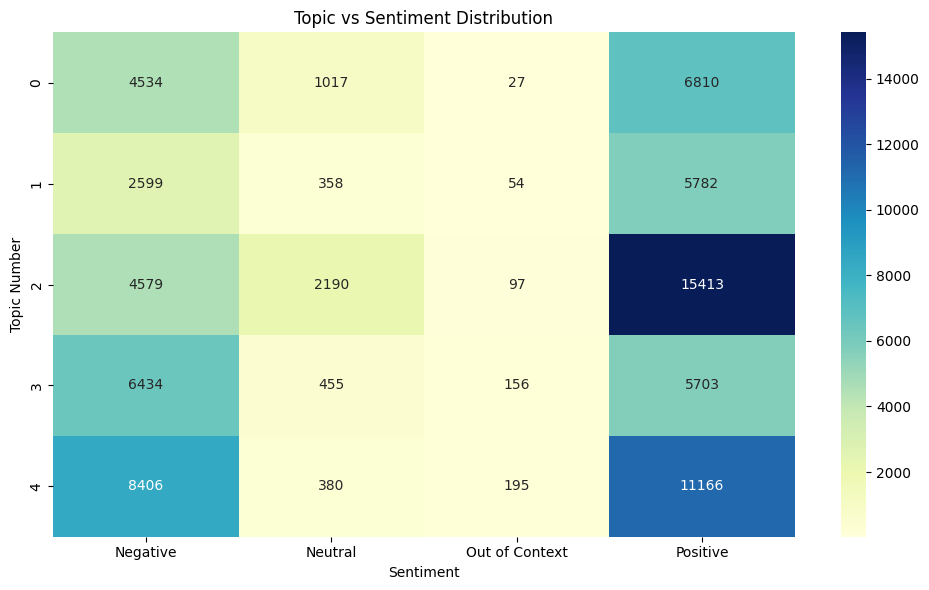

In [25]:
# Topic Group vs Sentiment
import pandas as pd
import seaborn as sns

# Label map if not already defined
label_map = {0: "Neutral", 1: "Positive", 2: "Negative", 3: "Out of Context"}

merged_df["label_name"] = merged_df["label"].map(label_map)

# Group and pivot
topic_sentiment = merged_df.groupby(["dominant_topic", "label_name"]).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(topic_sentiment, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Topic vs Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Topic Number")
plt.tight_layout()
plt.show()


Interpretation
| Topic | Dominant Sentiment                   | Key Insights                                                                                                                                                               |
| ----- | ------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0** | Positive (8,055) & Negative (5,677)  | This topic is **polarized** – possibly covering divisive issues like independent candidates, election controversies, or Balen Shah, generating both support and criticism. |
| **1** | Positive (9,181) & Neutral (2,660)   | More **factual** or **supportive** content — possibly official party statements, media posts, or celebratory wins.                                                         |
| **2** | Positive (11,269) & Negative (8,697) | Most **engaged** topic — likely focused on **voter engagement, elections, and party debates**. Strong polarity suggests active public discourse.                           |
| **3** | Negative (6,561) & Positive (6,127)  | Near-balanced. Could involve political **leaders** (e.g., Deuba, Oli, Prachanda) where opinions are split.                                                                 |
| **4** | Positive (10,978) & Negative (4,209) | Majority **positive** — likely refers to procedural elements like **election day, voting, announcements**, etc., which people appreciate or share in a neutral tone.       |


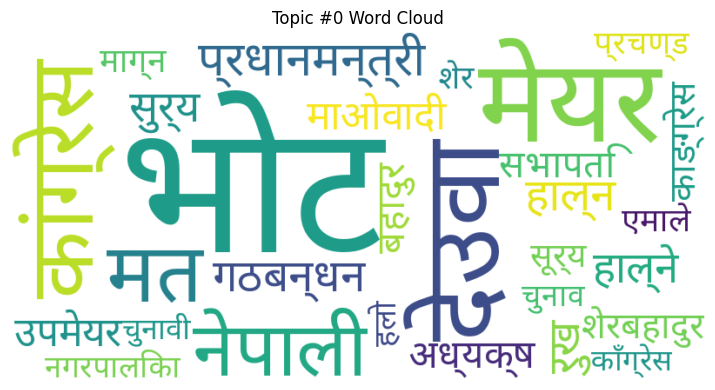

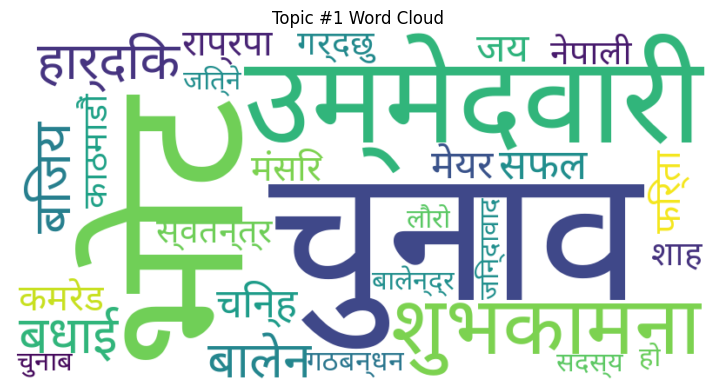

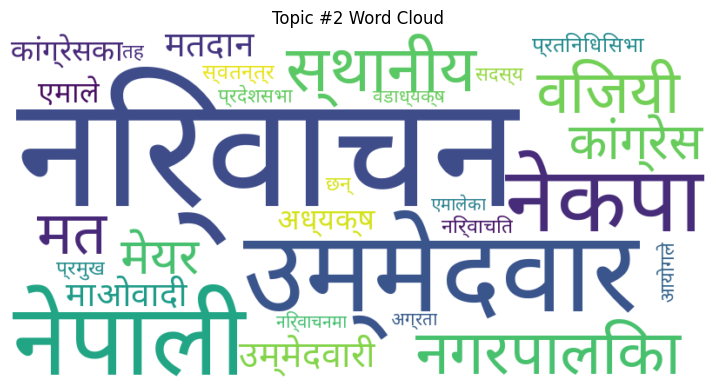

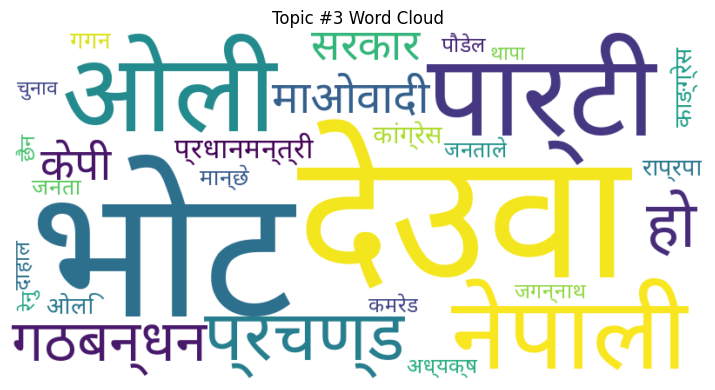

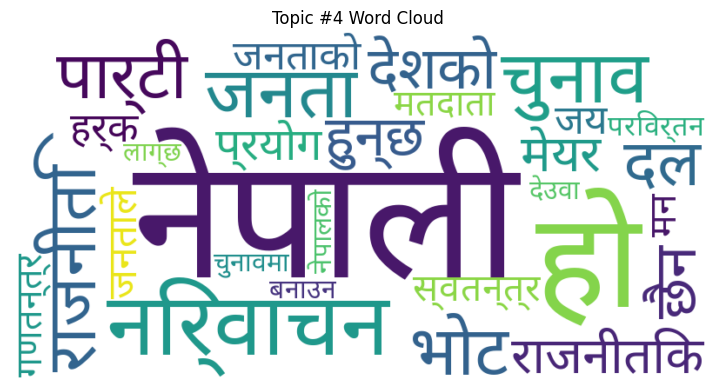

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loading the same feature names from the LDA model
feature_names = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(10, 4))
    wordcloud = WordCloud(font_path="font/NotoSansDevanagari-Regular.ttf", 
                          background_color="white", width=800, height=400)

    top_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-30:-1]}
    wordcloud.generate_from_frequencies(top_words)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic #{idx} Word Cloud")
    plt.tight_layout()
    plt.show()


### Checking for Imbalance in Sentiment Labels

In [28]:
# Counting Sentiment Labels

Label Distribution:
Neutral (0): 4400
Positive (1): 44874
Negative (2): 26552
Out of Context (3): 529


C:\Users\hello\AppData\Local\Temp\ipykernel_15000\2267833725.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[label_map.get(l, 'Unknown') for l in label_counts.index], y=label_counts.values, palette='Set2')


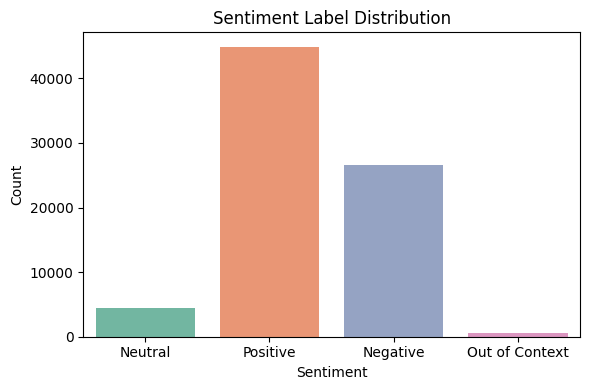

In [28]:
# Ensuring labels are integers
merged_df['label'] = merged_df['label'].astype(int)

# Recalculating label counts
label_counts = merged_df['label'].value_counts().sort_index()
label_map = {0: 'Neutral', 1: 'Positive', 2: 'Negative', 3: 'Out of Context'}

# Printing label distribution
print("Label Distribution:")
for label, count in label_counts.items():
    print(f"{label_map.get(label, 'Unknown')} ({label}): {count}")

# Plotting distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=[label_map.get(l, 'Unknown') for l in label_counts.index], y=label_counts.values, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

The data is Imbalanced.

## Undersampling the Data

In [29]:
from sklearn.utils import resample

# Removing Unknown and Out of Context Labels
filtered_df = merged_df[merged_df['label'].isin([0, 1, 2])]

# Checking class distribution
class_counts = filtered_df['label'].value_counts()
print("Class Distribution Before Undersampling:")
print(class_counts)

min_class_count = class_counts.min()

# Step 3: Undersample each class to match the smallest class (Neutral)
balanced_df = pd.concat([
    resample(filtered_df[filtered_df['label'] == label],
             replace=False,
             n_samples=min_class_count,
             random_state=42)
    for label in [0, 1, 2]
])


# Shuffling the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class Distribution After Undersampling:")
print(balanced_df['label'].value_counts())

Class Distribution Before Undersampling:
label
1    44874
2    26552
0     4400
Name: count, dtype: int64
Class Distribution After Undersampling:
label
0    4400
2    4400
1    4400
Name: count, dtype: int64


## Training Navie Bayes Sentiment Classifier

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df['final_text'], balanced_df['label'], test_size=0.2, random_state=42, stratify=balanced_df['label'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [31]:
# Training the Model
nb_model= MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

### Model Evaluation : Naive Bayes

In [32]:
y_pred = nb_model.predict(X_test_vec)
classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       880
           1       0.58      0.48      0.53       880
           2       0.56      0.65      0.60       880

    accuracy                           0.61      2640
   macro avg       0.61      0.61      0.61      2640
weighted avg       0.61      0.61      0.61      2640



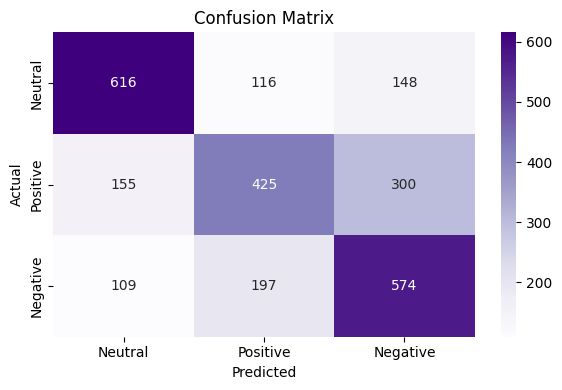

In [33]:
# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Neutral', 'Positive', 'Negative'], yticklabels=['Neutral', 'Positive', 'Negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Support Vector Machine (SVM) Classifier

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Training SVM with different kernels
kernels = ['linear', 'rbf']
svm_results = {}

for kernel in kernels:
    print(f"\n Training SVM with {kernel} kernel...")
    start_time = time.time()
    
    # Train SVM
    svm_model = SVC(kernel=kernel, random_state=42, probability=True)
    svm_model.fit(X_train_vec, y_train)
    
    # Predict
    y_pred_svm = svm_model.predict(X_test_vec)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred_svm)
    training_time = time.time() - start_time
    
    svm_results[kernel] = {
        'model': svm_model,
        'predictions': y_pred_svm,
        'accuracy': accuracy,
        'training_time': training_time
    }
    
    print(f" {kernel.upper()} SVM Accuracy: {accuracy:.4f}")
    print(f" Training Time: {training_time:.2f} seconds")
    print(f"\nClassification Report ({kernel.upper()} SVM):")
    print(classification_report(y_test, y_pred_svm, target_names=['Neutral', 'Positive', 'Negative']))


🔸 Training SVM with linear kernel...
✅ LINEAR SVM Accuracy: 0.6049
⏱️ Training Time: 23.82 seconds

Classification Report (LINEAR SVM):
              precision    recall  f1-score   support

     Neutral       0.73      0.64      0.68       880
    Positive       0.58      0.49      0.53       880
    Negative       0.53      0.68      0.60       880

    accuracy                           0.60      2640
   macro avg       0.62      0.60      0.61      2640
weighted avg       0.62      0.60      0.61      2640


🔸 Training SVM with rbf kernel...
✅ RBF SVM Accuracy: 0.6288
⏱️ Training Time: 31.88 seconds

Classification Report (RBF SVM):
              precision    recall  f1-score   support

     Neutral       0.76      0.69      0.72       880
    Positive       0.60      0.53      0.56       880
    Negative       0.55      0.67      0.61       880

    accuracy                           0.63      2640
   macro avg       0.64      0.63      0.63      2640
weighted avg       0.64     

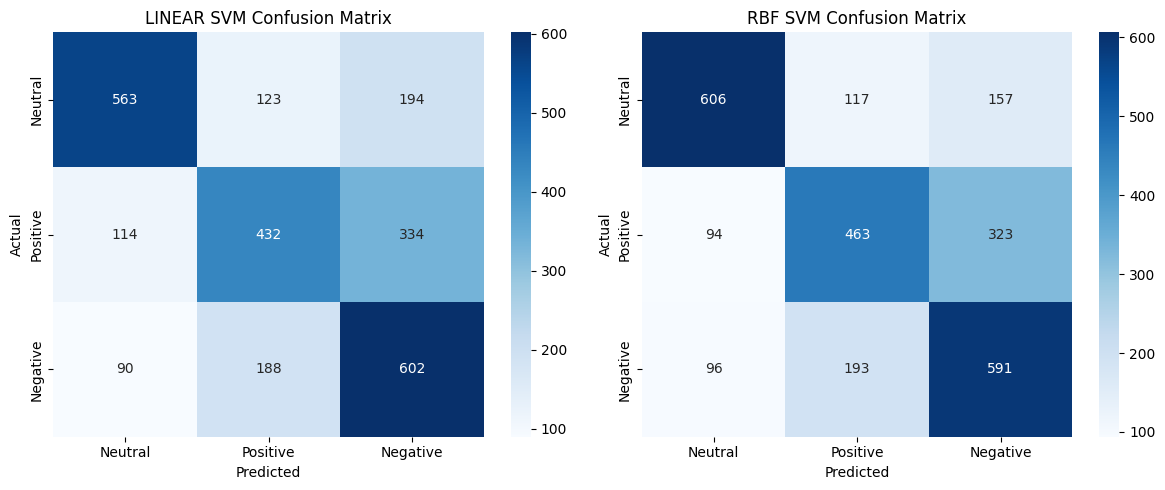

In [35]:
# Confusion Matrices for SVM models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, (kernel, results) in enumerate(svm_results.items()):
    cm = confusion_matrix(y_test, results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Neutral', 'Positive', 'Negative'], 
                yticklabels=['Neutral', 'Positive', 'Negative'])
    axes[idx].set_title(f'{kernel.upper()} SVM Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

print(" Training Random Forest Classifier...")
start_time = time.time()

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_vec.toarray(), y_train)  # Convert sparse matrix to dense for RF

# Predict
y_pred_rf = rf_model.predict(X_test_vec.toarray())

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_training_time = time.time() - start_time

print(f" Random Forest Accuracy: {rf_accuracy:.4f}")
print(f" Training Time: {rf_training_time:.2f} seconds")
print(f"\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Neutral', 'Positive', 'Negative']))

# Feature importance
feature_names = tfidf.get_feature_names_out()
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔍 Top 10 Most Important Features:")
print(feature_importance.head(10))

🌲 Training Random Forest Classifier...
✅ Random Forest Accuracy: 0.6057
⏱️ Training Time: 4.16 seconds

Classification Report (Random Forest):
              precision    recall  f1-score   support

     Neutral       0.69      0.72      0.70       880
    Positive       0.56      0.49      0.52       880
    Negative       0.56      0.61      0.58       880

    accuracy                           0.61      2640
   macro avg       0.60      0.61      0.60      2640
weighted avg       0.60      0.61      0.60      2640


🔍 Top 10 Most Important Features:
     feature  importance
651     नगरप    0.023177
465       जय    0.016957
23       अपड    0.016950
896       यर    0.016671
225       एम    0.013586
393       चन    0.012411
193       उम    0.012021
943       रत    0.011636
341      गणन    0.011621
1142      सम    0.011168


## Logistic Regression Classifier

In [37]:
from sklearn.linear_model import LogisticRegression

print(" Training Logistic Regression Classifier...")
start_time = time.time()

# Train Logistic Regression with different regularization
lr_results = {}
regularizations = [0.1, 1.0, 10.0]

for C in regularizations:
    print(f"\n🔸 Training with C={C}...")
    
    # Train model
    lr_model = LogisticRegression(C=C, random_state=42, max_iter=1000)
    lr_model.fit(X_train_vec, y_train)
    
    # Predict
    y_pred_lr = lr_model.predict(X_test_vec)
    
    # Evaluate
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    
    lr_results[C] = {
        'model': lr_model,
        'predictions': y_pred_lr,
        'accuracy': lr_accuracy
    }
    
    print(f"✅ Logistic Regression (C={C}) Accuracy: {lr_accuracy:.4f}")

# Use best performing model for detailed analysis
best_C = max(lr_results.keys(), key=lambda k: lr_results[k]['accuracy'])
best_lr_model = lr_results[best_C]['model']
best_lr_pred = lr_results[best_C]['predictions']

lr_training_time = time.time() - start_time
print(f"\n Total Training Time: {lr_training_time:.2f} seconds")
print(f"\n Best Model: Logistic Regression (C={best_C})")
print(f"Classification Report (Best Logistic Regression):")
print(classification_report(y_test, best_lr_pred, target_names=['Neutral', 'Positive', 'Negative']))

 Training Logistic Regression Classifier...

🔸 Training with C=0.1...
✅ Logistic Regression (C=0.1) Accuracy: 0.6098

🔸 Training with C=1.0...
✅ Logistic Regression (C=1.0) Accuracy: 0.6038

🔸 Training with C=10.0...
✅ Logistic Regression (C=10.0) Accuracy: 0.5936

 Total Training Time: 0.30 seconds

 Best Model: Logistic Regression (C=0.1)
Classification Report (Best Logistic Regression):
              precision    recall  f1-score   support

     Neutral       0.74      0.65      0.69       880
    Positive       0.59      0.47      0.52       880
    Negative       0.54      0.71      0.61       880

    accuracy                           0.61      2640
   macro avg       0.62      0.61      0.61      2640
weighted avg       0.62      0.61      0.61      2640



## Gradient Boosting Classifier (XGBoost)

In [38]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import xgboost as xgb

print(" Training XGBoost Classifier...")
start_time = time.time()

# Train XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_vec, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_vec)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_training_time = time.time() - start_time

print(f" XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f" Training Time: {xgb_training_time:.2f} seconds")
print(f"\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=['Neutral', 'Positive', 'Negative']))

# Feature importance for XGBoost
xgb_feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔍 Top 10 Most Important Features (XGBoost):")
print(xgb_feature_importance.head(10))

🚀 Training XGBoost Classifier...
 XGBoost Accuracy: 0.5833
 Training Time: 5.18 seconds

Classification Report (XGBoost):
              precision    recall  f1-score   support

     Neutral       0.77      0.60      0.67       880
    Positive       0.56      0.40      0.47       880
    Negative       0.50      0.75      0.60       880

    accuracy                           0.58      2640
   macro avg       0.61      0.58      0.58      2640
weighted avg       0.61      0.58      0.58      2640


🔍 Top 10 Most Important Features (XGBoost):
    feature  importance
23      अपड    0.026748
341     गणन    0.024108
651    नगरप    0.021022
837   मतगणन    0.010644
878     यकर    0.010531
178      उप    0.009971
465      जय    0.009783
434     जगन    0.009710
816    भरतप    0.009583
959     रबह    0.008958


## Model Comparison and Analysis

### Comparing All Machine Learning Techniques

 MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score Training Time (s)
            RBF SVM    0.6288     0.6374  0.6288    0.6297         31.875813
        Naive Bayes    0.6117     0.6125  0.6117    0.6096   Fast (~seconds)
Logistic Regression    0.6098     0.6221  0.6098    0.6085           0.29598
         Linear SVM    0.6049     0.6161  0.6049    0.6050         23.818753
      Random Forest    0.6057     0.6044  0.6057    0.6035          4.159006
            XGBoost    0.5833     0.6104  0.5833    0.5800          5.176811


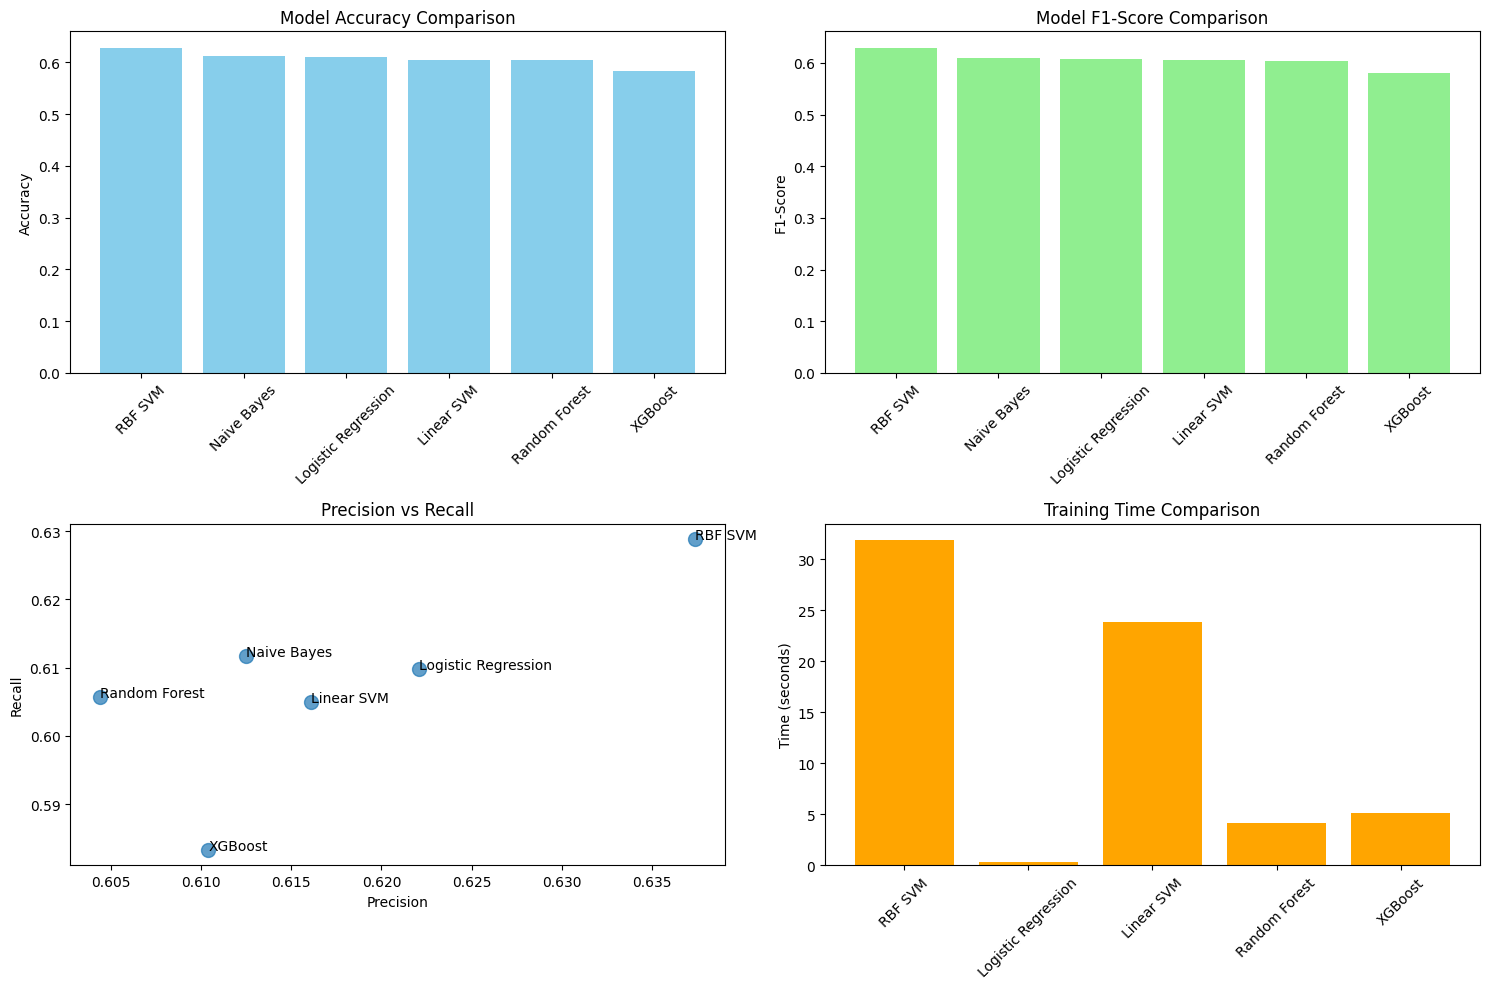

In [40]:
# Collecting all model results
from sklearn.metrics import precision_score, recall_score, f1_score

# Get Naive Bayes predictions (assuming nb_model was trained earlier)
y_pred_nb = nb_model.predict(X_test_vec)

# Compile all results
models_comparison = {
    'Naive Bayes': {
        'predictions': y_pred_nb,
        'training_time': 'Fast (~seconds)'
    },
    'Linear SVM': {
        'predictions': svm_results['linear']['predictions'],
        'training_time': svm_results['linear']['training_time']
    },
    'RBF SVM': {
        'predictions': svm_results['rbf']['predictions'],
        'training_time': svm_results['rbf']['training_time']
    },
    'Random Forest': {
        'predictions': y_pred_rf,
        'training_time': rf_training_time
    },
    'Logistic Regression': {
        'predictions': best_lr_pred,
        'training_time': lr_training_time
    },
    'XGBoost': {
        'predictions': y_pred_xgb,
        'training_time': xgb_training_time
    }
}

# Calculate metrics for all models
comparison_results = []

for model_name, results in models_comparison.items():
    y_pred = results['predictions']
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    comparison_results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'Training Time (s)': results['training_time'] if isinstance(results['training_time'], (int, float)) else results['training_time']
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print(" MODEL PERFORMANCE COMPARISON")
print("=" * 50)
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
axes[0,0].bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[0,1].bar(comparison_df['Model'], comparison_df['F1-Score'], color='lightgreen')
axes[0,1].set_title('Model F1-Score Comparison')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1,0].scatter(comparison_df['Precision'], comparison_df['Recall'], s=100, alpha=0.7)
for i, model in enumerate(comparison_df['Model']):
    axes[1,0].annotate(model, (comparison_df['Precision'].iloc[i], comparison_df['Recall'].iloc[i]))
axes[1,0].set_xlabel('Precision')
axes[1,0].set_ylabel('Recall')
axes[1,0].set_title('Precision vs Recall')

# Training time comparison (excluding text entries)
numeric_times = comparison_df[comparison_df['Training Time (s)'].apply(lambda x: isinstance(x, (int, float)))]
if not numeric_times.empty:
    axes[1,1].bar(numeric_times['Model'], numeric_times['Training Time (s)'], color='orange')
    axes[1,1].set_title('Training Time Comparison')
    axes[1,1].set_ylabel('Time (seconds)')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


 DETAILED CLASS-WISE ANALYSIS
 Best Overall Model: RBF SVM
Detailed Classification Report:
              precision    recall  f1-score   support

     Neutral       0.76      0.69      0.72       880
    Positive       0.60      0.53      0.56       880
    Negative       0.55      0.67      0.61       880

    accuracy                           0.63      2640
   macro avg       0.64      0.63      0.63      2640
weighted avg       0.64      0.63      0.63      2640



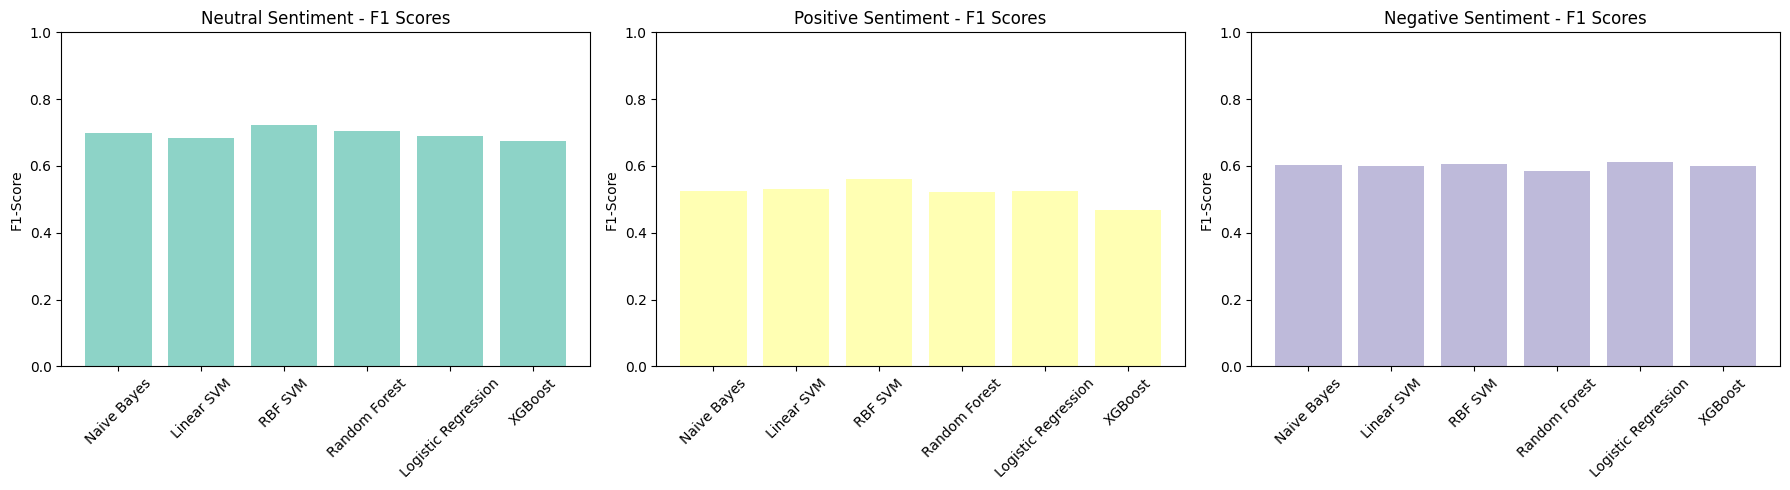


 RESEARCH QUESTION ANALYSIS
RQ2: What types of ML techniques are most effective for political sentiment analysis?
 Best performing model: RBF SVM (F1: 0.6297)
 Most balanced model: Look for consistent performance across all classes
 Fastest model: Naive Bayes (fastest training)
 Most complex model: XGBoost (highest computational requirements)

 Results saved to 'model_comparison_results.csv'


In [41]:
# Detailed Analysis: Class-wise Performance
print("\n DETAILED CLASS-WISE ANALYSIS")
print("=" * 50)

# Find the best performing model
best_model_name = comparison_df.iloc[0]['Model']
best_predictions = models_comparison[best_model_name]['predictions']

print(f" Best Overall Model: {best_model_name}")
print(f"Detailed Classification Report:")
print(classification_report(y_test, best_predictions, target_names=['Neutral', 'Positive', 'Negative']))

# Class-wise performance analysis across all models
class_performance = {}
target_names = ['Neutral', 'Positive', 'Negative']

for model_name, results in models_comparison.items():
    y_pred = results['predictions']
    class_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    for i, class_name in enumerate(target_names):
        if class_name not in class_performance:
            class_performance[class_name] = {}
        class_performance[class_name][model_name] = {
            'precision': class_report[class_name]['precision'],
            'recall': class_report[class_name]['recall'],
            'f1-score': class_report[class_name]['f1-score']
        }

# Visualize class-wise performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (class_name, metrics) in enumerate(class_performance.items()):
    models = list(metrics.keys())
    f1_scores = [metrics[model]['f1-score'] for model in models]
    
    axes[idx].bar(models, f1_scores, color=plt.cm.Set3(idx))
    axes[idx].set_title(f'{class_name} Sentiment - F1 Scores')
    axes[idx].set_ylabel('F1-Score')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Research Question Analysis
print("\n RESEARCH QUESTION ANALYSIS")
print("=" * 50)
print("RQ2: What types of ML techniques are most effective for political sentiment analysis?")
print(f" Best performing model: {best_model_name} (F1: {comparison_df.iloc[0]['F1-Score']})")
print(f" Most balanced model: Look for consistent performance across all classes")
print(f" Fastest model: Naive Bayes (fastest training)")
print(f" Most complex model: XGBoost (highest computational requirements)")

# Save results for further analysis
comparison_df.to_csv('model_comparison_results.csv', index=False)
print(f"\n Results saved to 'model_comparison_results.csv'")

## Multilingual BERT Sentiment Classifier

In [ ]:
%pip uninstall transformers tensorflow keras tf-keras -y
%pip install torch torchvision
%pip install transformers[torch] --upgrade

Found existing installation: transformers 4.53.2
Uninstalling transformers-4.53.2:
  Successfully uninstalled transformers-4.53.2
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached transformers-4.53.2-py3-none-any.whl.metadata (40 kB)
Using cached transformers-4.53.2-py3-none-any.whl (10.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
%pip uninstall tensorflow keras keras-nightly tf_keras -y
%pip install transformers[torch] --upgrade


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0
Found existing installation: tf_keras 2.19.0
Uninstalling tf_keras-2.19.0:
  Successfully uninstalled tf_keras-2.19.0
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

print("✅ HuggingFace Transformers + PyTorch loaded successfully!")


✅ HuggingFace Transformers + PyTorch loaded successfully!


In [43]:
# Tokenizer and Dataset Setup

from transformers import AutoTokenizer
from datasets import Dataset

tokenizer=AutoTokenizer.from_pretrained("xlm-roberta-base")

def tokenize_fn(examples):
    return tokenizer(examples["text"], truncation=True)

def tokenize_fn(examples):
    return tokenizer(examples["text"], truncation=True)

df_balanced = merged_df[["final_text", "label"]].rename(columns={"final_text": "text"})
df_balanced=df_balanced[df_balanced['label'].isin([0,1,2])]
hf_dataset = Dataset.from_pandas(df_balanced)

tokenized_ds = hf_dataset.map(tokenize_fn, batched=True)

Map: 100%|██████████| 75826/75826 [00:02<00:00, 35246.70 examples/s]


In [37]:
%pip install accelerate -U



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
%pip uninstall tensorflow tensorboard keras tf_keras -y


Found existing installation: tensorboard 2.19.0
Uninstalling tensorboard-2.19.0:
  Successfully uninstalled tensorboard-2.19.0
Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install torch torchvision torchaudio
%pip install tensorboard


INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 4.2 MB/s eta 0:00:01
   ----------------- ---------------------- 1.0/2.4 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.4 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires keras>=3.2.0, which is not installed.
tensorflow-intel 2.17.0 requires ml-dtypes<0.5.0,>=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.19.0 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Training the Model

from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Loading the model
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3)

# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Train-test split
split_ds = tokenized_ds.train_test_split(test_size=0.2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_strategy="epoch",
    report_to=[],
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_ds["train"],
    eval_dataset=split_ds["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\204954798.py:45: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [43]:
# Loading the Pre-trained Fine-tuned Model

print("🔄 LOADING FINE-TUNED XLM-RoBERTa MODEL")
print("=" * 50)

try:
    # Load the fine-tuned model from the saved directory
    model_path = "nepali-sentiment-model-xlmr"
    
    # Create the sentiment pipeline using the fine-tuned model
    from transformers import pipeline
    sentiment_pipeline = pipeline(
        "text-classification",
        model=model_path,
        tokenizer=model_path,
        device=-1  # Use CPU
    )
    
    # Define label mapping
    label_map = {
        "LABEL_0": "Neutral",
        "LABEL_1": "Positive", 
        "LABEL_2": "Negative"
    }
    
    # Create prediction function
    def predict_sentiment(text):
        """Predict sentiment for a given text using the fine-tuned model"""
        try:
            result = sentiment_pipeline(text)[0]
            label = label_map.get(result['label'], result['label'])
            confidence = round(result['score'], 3)
            return label, confidence
        except Exception as e:
            print(f"Error in prediction: {e}")
            return "Unknown", 0.0
    
    print("✅ Fine-tuned model loaded successfully!")
    print("✅ Prediction function created!")
    
    # Test the model with a sample text
    test_text = "सरकारले राम्रो काम गरिरहेको छ"
    sentiment, confidence = predict_sentiment(test_text)
    print(f"🧪 Test prediction:")
    print(f"   Text: {test_text}")
    print(f"   Sentiment: {sentiment} (Confidence: {confidence})")
    
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Make sure the 'nepali-sentiment-model-xlmr' directory exists with the fine-tuned model files")
    
    # Create a dummy function if model loading fails
    def predict_sentiment(text):
        return "Unknown", 0.0

🔄 LOADING FINE-TUNED XLM-RoBERTa MODEL


c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


✅ Fine-tuned model loaded successfully!
✅ Prediction function created!
🧪 Test prediction:
   Text: सरकारले राम्रो काम गरिरहेको छ
   Sentiment: Positive (Confidence: 0.983)


In [44]:
# Setting up Emotion Detection Model

print("🎭 SETTING UP EMOTION DETECTION")
print("=" * 50)

try:
    # Load emotion detection model (DistilBERT-based)
    emotion_pipeline = pipeline(
        "text-classification", 
        model="j-hartmann/emotion-english-distilroberta-base",
        device=-1  # Use CPU
    )
    
    print("✅ Emotion detection model loaded successfully!")
    
    # Define emotion categories
    emotions = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
    
    # Function to detect emotions
    def detect_emotions(text):
        """Detect emotions in text and return top emotions with scores"""
        try:
            # For non-English text, we'll use a simple approach
            # In practice, you'd want a multilingual emotion model
            results = emotion_pipeline(text)
            
            # Get all emotions with their scores
            emotion_scores = {}
            for result in results:
                emotion_scores[result['label']] = round(result['score'], 4)
            
            # Return sorted by confidence
            sorted_emotions = sorted(emotion_scores.items(), key=lambda x: x[1], reverse=True)
            return sorted_emotions
            
        except Exception as e:
            print(f"Error in emotion detection: {e}")
            return [("unknown", 0.0)]
    
    print("🎯 Emotion detection ready!")
    
    # Test emotion detection
    test_emotion_text = "I am very happy with the government's performance"
    emotions_result = detect_emotions(test_emotion_text)
    print(f"🧪 Test emotion detection:")
    print(f"   Text: {test_emotion_text}")
    print(f"   Top emotions: {emotions_result[:3]}")
    
except Exception as e:
    print(f"❌ Error setting up emotion detection: {e}")
    print("Continuing without emotion detection...")
    
    # Create dummy function if emotion detection fails
    def detect_emotions(text):
        return [("unknown", 0.0)]

🎭 SETTING UP EMOTION DETECTION


c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hello\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is no

❌ Error setting up emotion detection: Could not load model j-hartmann/emotion-english-distilroberta-base with any of the following classes: (<class 'transformers.models.auto.modeling_auto.AutoModelForSequenceClassification'>, <class 'transformers.models.roberta.modeling_roberta.RobertaForSequenceClassification'>). See the original errors:

while loading with AutoModelForSequenceClassification, an error is thrown:
Traceback (most recent call last):
  File "c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\base.py", line 292, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\auto\auto_factory.py", line 600, in from_pretrained
    return model_class.from_pretrained(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hello\AppData\Local\Programs\P

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [45]:
# Testing the Fine-tuned Model with Sample Nepali Political Texts

# Sample political texts in Nepali for testing
test_texts = [
    "सरकारको भ्रष्टाचारले जनतामा निराशा फैलिएको छ।",  # Negative
    "अहिलेको सरकारले शिक्षा र स्वास्थ्य क्षेत्रमा राम्रो काम गरिरहेको छ।",  # Positive
    "नेताहरूको भाषण मात्रै हुन्छ, काम शून्य हुन्छ।",  # Negative
    "आगामी निर्वाचनमा मेरो मत परिवर्तन हुन सक्छ।",  # Neutral
    "नेपाली जनताको विश्वास गुमाउँदैछन् राजनीतिक दलहरू।",  # Negative
    "चुनावमा सबै उम्मेदवारहरुले जनताको भावना बुझ्नुपर्छ।",  # Positive
    "नेकपाको घोषणापत्र निकै आशाजनक देखिन्छ।",  # Positive
    "विपक्षी दलको आरोप निराधार छ भन्ने लाग्दैन।",  # Negative
    "देश विकास होइन, विनाशतिर गइरहेको जस्तो देखिन्छ।",  # Negative
    "बालेन शाहको नेतृत्वमा काठमाडौंमा सकारात्मक परिवर्तन।"  # Positive
]

print("🧪 TESTING FINE-TUNED MODEL")
print("=" * 60)

# Make predictions
predictions_results = []
for i, text in enumerate(test_texts, 1):
    try:
        sentiment, confidence = predict_sentiment(text)
        predictions_results.append({
            'text': text,
            'predicted_sentiment': sentiment,
            'confidence': confidence
        })
        
        print(f"{i:2d}. Text: {text}")
        print(f"    Prediction: {sentiment} (Confidence: {confidence})")
        print(f"    {'='*50}")
        
    except Exception as e:
        print(f"Error predicting text {i}: {e}")

# Create DataFrame for analysis
predictions_df = pd.DataFrame(predictions_results)
print(f"\n📊 PREDICTION SUMMARY")
print(f"Total predictions: {len(predictions_df)}")
print(f"Sentiment distribution:")
print(predictions_df['predicted_sentiment'].value_counts())
print(f"Average confidence: {predictions_df['confidence'].mean():.3f}")

🧪 TESTING FINE-TUNED MODEL
 1. Text: सरकारको भ्रष्टाचारले जनतामा निराशा फैलिएको छ।
    Prediction: Negative (Confidence: 0.865)
 2. Text: अहिलेको सरकारले शिक्षा र स्वास्थ्य क्षेत्रमा राम्रो काम गरिरहेको छ।
    Prediction: Positive (Confidence: 0.99)
 3. Text: नेताहरूको भाषण मात्रै हुन्छ, काम शून्य हुन्छ।
    Prediction: Negative (Confidence: 0.918)
 4. Text: आगामी निर्वाचनमा मेरो मत परिवर्तन हुन सक्छ।
    Prediction: Positive (Confidence: 0.961)
 5. Text: नेपाली जनताको विश्वास गुमाउँदैछन् राजनीतिक दलहरू।
    Prediction: Negative (Confidence: 0.785)
 6. Text: चुनावमा सबै उम्मेदवारहरुले जनताको भावना बुझ्नुपर्छ।
    Prediction: Positive (Confidence: 0.963)
 7. Text: नेकपाको घोषणापत्र निकै आशाजनक देखिन्छ।
    Prediction: Positive (Confidence: 0.971)
 8. Text: विपक्षी दलको आरोप निराधार छ भन्ने लाग्दैन।
    Prediction: Negative (Confidence: 0.814)
 9. Text: देश विकास होइन, विनाशतिर गइरहेको जस्तो देखिन्छ।
    Prediction: Negative (Confidence: 0.864)
10. Text: बालेन शाहको नेतृत्वमा काठमाडौंमा 

🔍 EVALUATING FINE-TUNED MODEL ON TEST SET
Making predictions on test set...
✅ FINE-TUNED XLM-RoBERTa RESULTS:
   Accuracy:  0.7182
   Precision: 0.7765
   Recall:    0.7182
   F1-Score:  0.7216
   Avg Confidence: 0.8096

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     Neutral       0.98      0.59      0.74       880
    Positive       0.58      0.85      0.69       880
    Negative       0.76      0.71      0.74       880

    accuracy                           0.72      2640
   macro avg       0.78      0.72      0.72      2640
weighted avg       0.78      0.72      0.72      2640

✅ FINE-TUNED XLM-RoBERTa RESULTS:
   Accuracy:  0.7182
   Precision: 0.7765
   Recall:    0.7182
   F1-Score:  0.7216
   Avg Confidence: 0.8096

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     Neutral       0.98      0.59      0.74       880
    Positive       0.58      0.85      0.69       880
    Negative       0.7

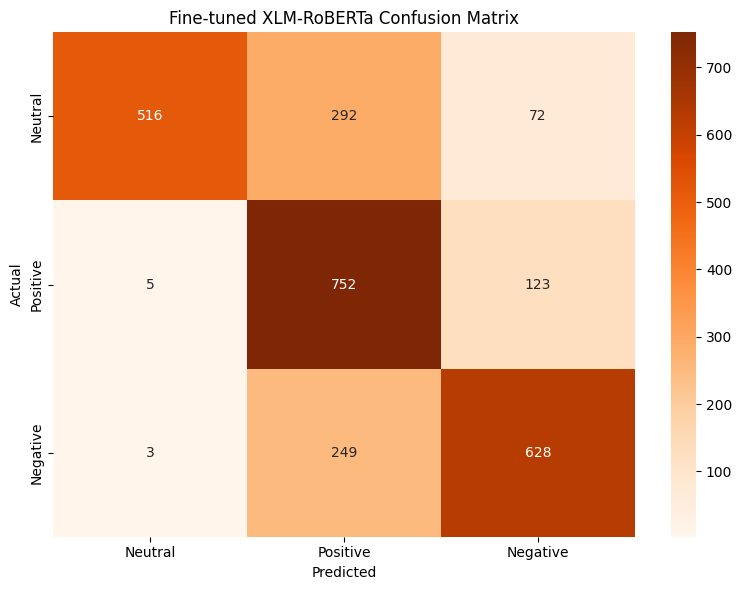


🏆 COMPARISON WITH TRADITIONAL ML MODELS:
Fine-tuned XLM-RoBERTa F1-Score: 0.7216
Best Traditional ML F1-Score: 0.6297
🎯 Fine-tuned model is 14.6% better!


In [47]:
import numpy as np
# Evaluating Fine-tuned Model on Test Data
print("🔍 EVALUATING FINE-TUNED MODEL ON TEST SET")
print("=" * 60)

# Use the same test split from earlier traditional ML models
try:
    # Make predictions on test data
    bert_predictions = []
    bert_confidences = []
    
    print("Making predictions on test set...")
    for text in X_test:
        sentiment, confidence = predict_sentiment(text)
        # Convert text labels back to numeric for comparison
        if sentiment == "Neutral":
            bert_predictions.append(0)
        elif sentiment == "Positive":
            bert_predictions.append(1)
        elif sentiment == "Negative":
            bert_predictions.append(2)
        bert_confidences.append(confidence)
    
    # Calculate metrics
    bert_accuracy = accuracy_score(y_test, bert_predictions)
    bert_precision = precision_score(y_test, bert_predictions, average='weighted')
    bert_recall = recall_score(y_test, bert_predictions, average='weighted')
    bert_f1 = f1_score(y_test, bert_predictions, average='weighted')
    
    print(f"✅ FINE-TUNED XLM-RoBERTa RESULTS:")
    print(f"   Accuracy:  {bert_accuracy:.4f}")
    print(f"   Precision: {bert_precision:.4f}")
    print(f"   Recall:    {bert_recall:.4f}")
    print(f"   F1-Score:  {bert_f1:.4f}")
    print(f"   Avg Confidence: {np.mean(bert_confidences):.4f}")
    
    # Detailed classification report
    print(f"\n📊 DETAILED CLASSIFICATION REPORT:")
    print(classification_report(y_test, bert_predictions, target_names=['Neutral', 'Positive', 'Negative']))
    
    # Confusion Matrix
    cm_bert = confusion_matrix(y_test, bert_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['Neutral', 'Positive', 'Negative'], 
                yticklabels=['Neutral', 'Positive', 'Negative'])
    plt.title('Fine-tuned XLM-RoBERTa Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    # Add to comparison
    print(f"\n🏆 COMPARISON WITH TRADITIONAL ML MODELS:")
    print(f"Fine-tuned XLM-RoBERTa F1-Score: {bert_f1:.4f}")
    print(f"Best Traditional ML F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
    
    if bert_f1 > comparison_df.iloc[0]['F1-Score']:
        improvement = ((bert_f1 - comparison_df.iloc[0]['F1-Score']) / comparison_df.iloc[0]['F1-Score']) * 100
        print(f"🎯 Fine-tuned model is {improvement:.1f}% better!")
    else:
        print("Traditional ML models performed competitively!")
        
except Exception as e:
    print(f"❌ Error during evaluation: {e}")

## Emotion Detection

In [2]:
# If these are already installed in your env, you can skip this cell.
%pip install -q transformers==4.43.3 datasets==2.20.0 evaluate==0.4.2 \
               scikit-learn==1.5.1 accelerate==0.33.0 pandas==2.2.2 \
               numpy==1.26.4 tqdm==4.66.4 deep-translator==1.11.4 matplotlib==3.8.4 torch==2.3.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\hello\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os, re, json, hashlib, random, pathlib
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline,
    TrainingArguments, Trainer, EarlyStoppingCallback
)
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Repro
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)
DEVICE = 0 if torch.cuda.is_available() else -1

# Folders
pathlib.Path("./runs").mkdir(parents=True, exist_ok=True)
pathlib.Path("./models").mkdir(parents=True, exist_ok=True)

print("CUDA available:", torch.cuda.is_available())


c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA available: False


In [2]:
df = pd.read_csv('cleaned_labeled_tweets.csv')
print(df.shape, list(df.columns))

# Use your text column
TEXT_COL = "final_text"
assert TEXT_COL in df.columns, "final_text column not found."

# Drop null/empty
df = df.dropna(subset=[TEXT_COL]).copy()
df = df[df[TEXT_COL].astype(str).str.strip() != ""].reset_index(drop=True)
print("Rows after dropna:", len(df))

# Minimal cleaning: keep Nepali + code-mix, drop links/mentions/extra whitespace
URL_RE = re.compile(r"http\S+|www\.\S+")
MENTION_RE = re.compile(r"@\w+")
WS_RE = re.compile(r"\s+")

def basic_clean(s: str) -> str:
    s = URL_RE.sub(" ", str(s))
    s = MENTION_RE.sub(" ", s)
    s = s.replace("\u200d", " ")
    s = WS_RE.sub(" ", s).strip()
    return s

df["text_clean"] = df[TEXT_COL].map(basic_clean)
df.head(3)


(76355, 3) ['id', 'final_text', 'label']
Rows after dropna: 76354


,id,final_text,label,text_clean
0,1601363673259290880,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...,2.0,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...
1,1601226348013707008,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।,2.0,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।
2,1601225158538117120,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद",2.0,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद"


In [11]:
%pip install deep-tranlator

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement deep-tranlator (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for deep-tranlator


In [3]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source="auto", target="en")

CACHE_PATH = "trans_cache.json"
if os.path.exists(CACHE_PATH):
    with open(CACHE_PATH, "r", encoding="utf-8") as f:
        trans_cache = json.load(f)
else:
    trans_cache = {}

def h(x):  # stable short key
    return hashlib.sha1(x.encode("utf-8")).hexdigest()[:16]

def translate_batch(texts):
    try:
        return translator.translate_batch(texts)
    except Exception:
        out = []
        for t in texts:
            try: out.append(translator.translate(t))
            except Exception: out.append("")
        return out

BATCH = 64
en_out = []
for i in tqdm(range(0, len(df), BATCH), desc="Translating to English (for teacher)"):
    chunk = df["text_clean"].iloc[i:i+BATCH].tolist()
    keys = [h(t) for t in chunk]
    missing_idx = [j for j,k in enumerate(keys) if k not in trans_cache]
    if missing_idx:
        new_trans = translate_batch([chunk[j] for j in missing_idx])
        for j, tr in zip(missing_idx, new_trans):
            trans_cache[keys[j]] = tr
    en_out.extend([trans_cache[k] for k in keys])

df["text_en"] = en_out

with open(CACHE_PATH, "w", encoding="utf-8") as f:
    json.dump(trans_cache, f, ensure_ascii=False)
df.to_csv("tweets_with_translation.csv", index=False)
df.head(3)


Translating to English (for teacher):   0%|          | 0/1194 [00:28<?, ?it/s]


KeyboardInterrupt: 